Di buat oleh:

# **IFSIYANA RIZKI UTAMI / 4112321003**

#Persiapan

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

#color pallete

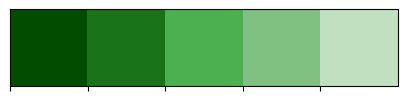

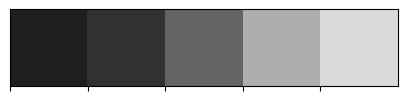

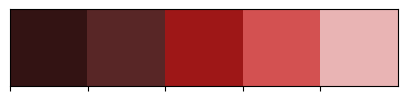

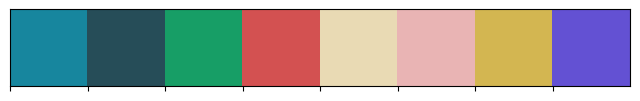

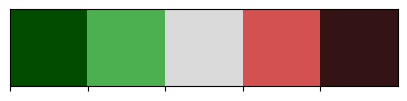

In [ ]:
# Membuat Color pallete untuk mempercantik tampilan
colors_green = ["#004D00", "#197419", '#4CAF50', '#80C080', '#C0E0C0']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#004D00", '#4CAF50', '#DADADA', '#D35151', '#331313']

sns.palplot(colors_green)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

#load & understanding data


In [ ]:
folder_path = "/content/drive/MyDrive/SMT 6/MK ML/PRAKTISI/Data"

# Mengecek ada file apa saja di `folder_path`
os.listdir(folder_path)

['2022.csv',
 '2021.csv',
 '2020.csv',
 '2019.csv',
 '2018.csv',
 '2017.csv',
 '2016.csv',
 '2015.csv']

In [ ]:
# Mendefinisikan path ke folder tempat file CSV disimpan
path_file_2022 = os.path.join(folder_path, '2022.csv')

# Membaca file CSV dan menyimpan isi ke dalam DataFrame sesuai dengan value `path_file_2022`
df_2022 = pd.read_csv(path_file_2022)

In [ ]:
df_2022.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [ ]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

In [ ]:
# drop Country tanpa Happiness Score
df_2022 = df_2022.dropna()

In [ ]:
df_2022.columns.tolist()

['RANK',
 'Country',
 'Happiness score',
 'Whisker-high',
 'Whisker-low',
 'Dystopia (1.83) + residual',
 'Explained by: GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption']

In [ ]:
# mendapatkan kolom `object`
obj_col = df_2022.select_dtypes(include=['O']).columns

# Mendapatkan semua kolom kecuali 'RANK' dan 'Country'
columns = [col for col in obj_col if col not in ['RANK', 'Country']]

# Convert kolom numeric yang awalnya `object` menjadi `float`
for col in columns:
    df_2022[col] = df_2022[col].str.replace(',', '.').astype(float)

In [ ]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: Gener

In [ ]:
df_2022.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


#10 Negara dengan Tingkat GDP per capita Tertinggi

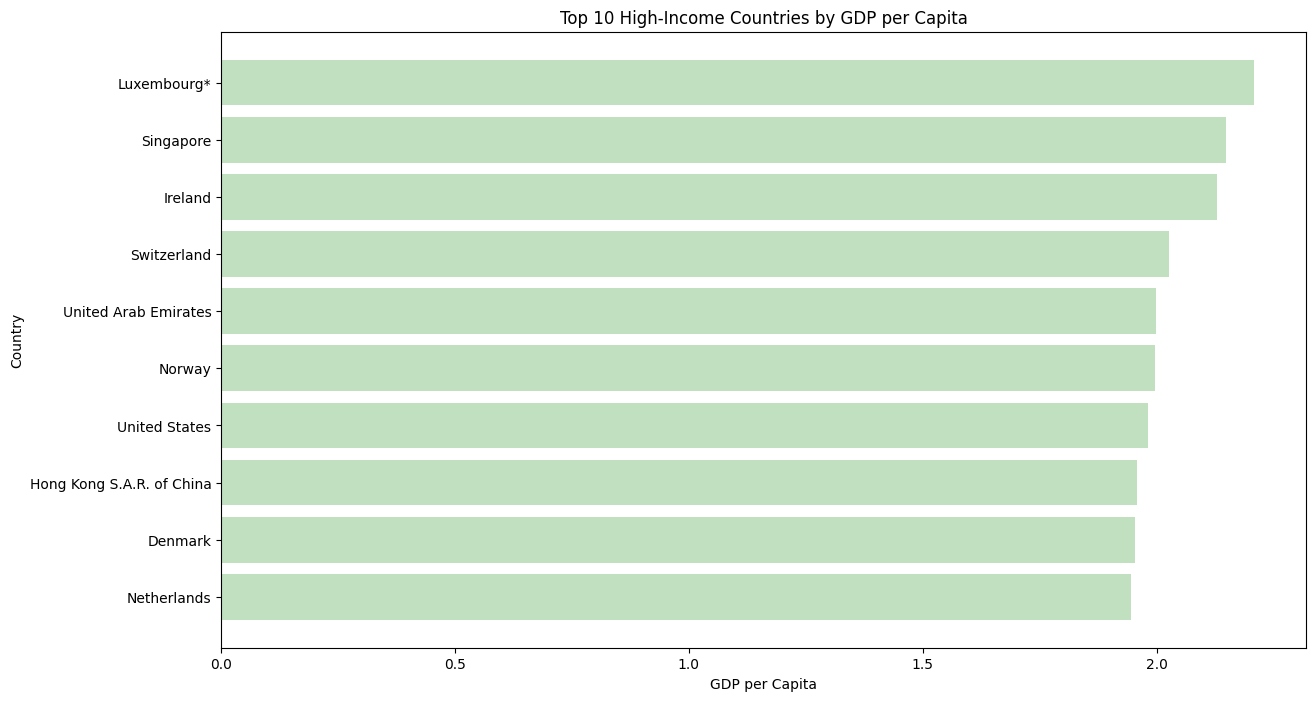

In [ ]:
# Mengurutkan berdasarkan GDP per capita
df = df_2022.sort_values(by='Explained by: GDP per capita', ascending=False).head(10)

# Plot
# Membuat figur dan sumbu untuk plot
fig, ax = plt.subplots(figsize=(14, 8))

plt.barh(df['Country'], df['Explained by: GDP per capita'], color='#C0E0C0')
plt.xlabel('GDP per Capita')
plt.ylabel('Country')
plt.title('Top 10 High-Income Countries by GDP per Capita')
plt.gca().invert_yaxis()  # Reverse the y-axis to show the highest income on top
plt.show()

#10 Negara dengan tingkat persepsi korupsi tinggi (semakin tidak korupsi)

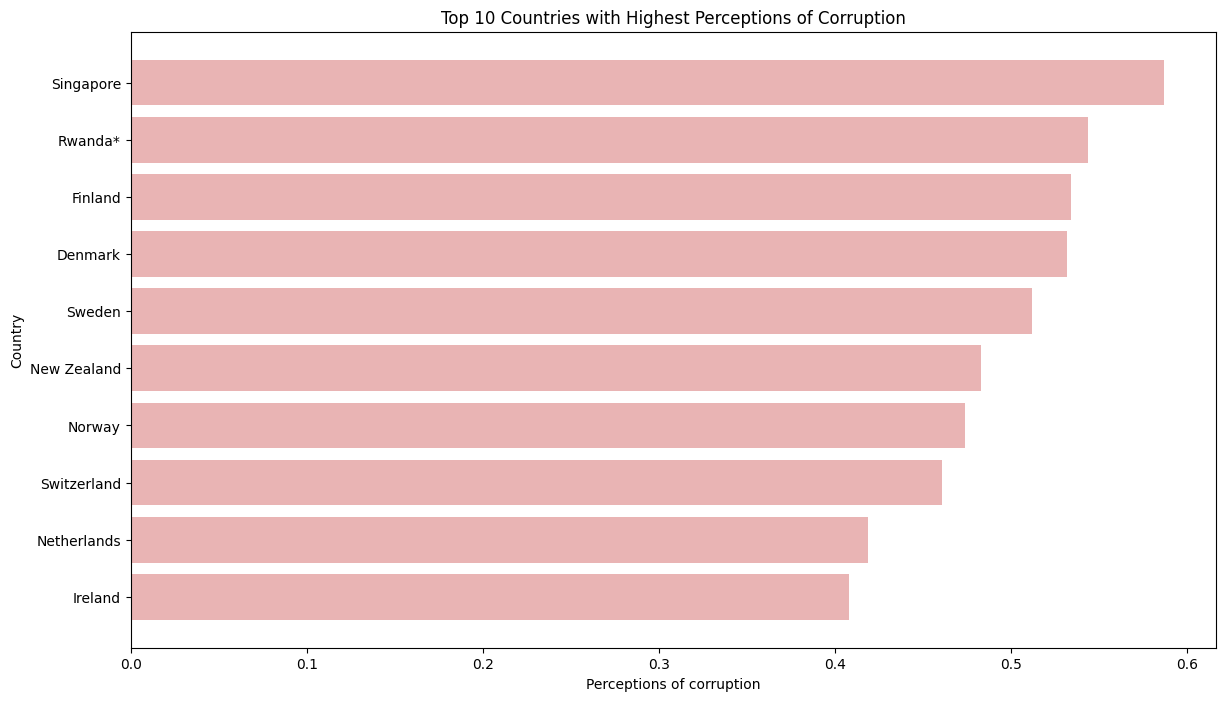

In [ ]:
# Mengurutkan berdasarkan persepsi korupsi
df = df_2022.sort_values(by='Explained by: Perceptions of corruption', ascending=False).head(10)

# Plot
# Membuat figur dan sumbu untuk plot
fig, ax = plt.subplots(figsize=(14, 8))

plt.barh(df['Country'], df['Explained by: Perceptions of corruption'], color='#E9B4B4')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Perceptions of Corruption')
plt.gca().invert_yaxis()  # Reverse the y-axis to show the highest perception on top
plt.show()

#memahami posisi indonesia

In [ ]:
## Indonesia Ranking Berapa?
df_2022.loc[df_2022["Country"]=='Indonesia']

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
86,87,Indonesia,5.24,5.341,5.139,1.3,1.382,0.883,0.539,0.62,0.468,0.047


In [ ]:
## Secara Urutan ada di percentile berapa?
total_country = df_2022.shape[0]
rank_indo = df_2022.loc[df_2022["Country"]=='Indonesia', 'RANK'].values[0]

print(rank_indo / total_country)

0.5958904109589042


#Indonesia di ASEAN

In [ ]:
## dibandingkan Negara tentangga Indonesia di posisi keberapa?
ASEAN_country =  ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar", "Philippines", "Singapore", "Thailand", "Timor-Leste", "Vietnam"]

df_2022.loc[df_2022["Country"].isin(ASEAN_country)]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
26,27,Singapore,6.480,6.569,6.392,0.932,2.149,1.127,0.851,0.672,0.163,0.587
59,60,Philippines,5.904,6.007,5.800,2.283,1.268,0.912,0.514,0.678,0.107,0.142
60,61,Thailand,5.891,5.994,5.788,1.600,1.535,1.096,0.697,0.617,0.321,0.026
69,70,Malaysia,5.711,5.845,5.578,1.471,1.689,0.938,0.620,0.654,0.213,0.126
76,77,Vietnam,5.485,5.570,5.400,1.735,1.252,0.932,0.611,0.707,0.143,0.105
86,87,Indonesia,5.240,5.341,5.139,1.300,1.382,0.883,0.539,0.620,0.468,0.047
94,95,Laos,5.140,5.263,5.018,1.709,1.239,0.654,0.479,0.679,0.197,0.184
113,114,Cambodia,4.640,4.765,4.516,1.410,1.019,0.732,0.505,0.740,0.166,0.068
125,126,Myanmar,4.394,4.511,4.277,0.877,1.038,0.829,0.491,0.513,0.452,0.194


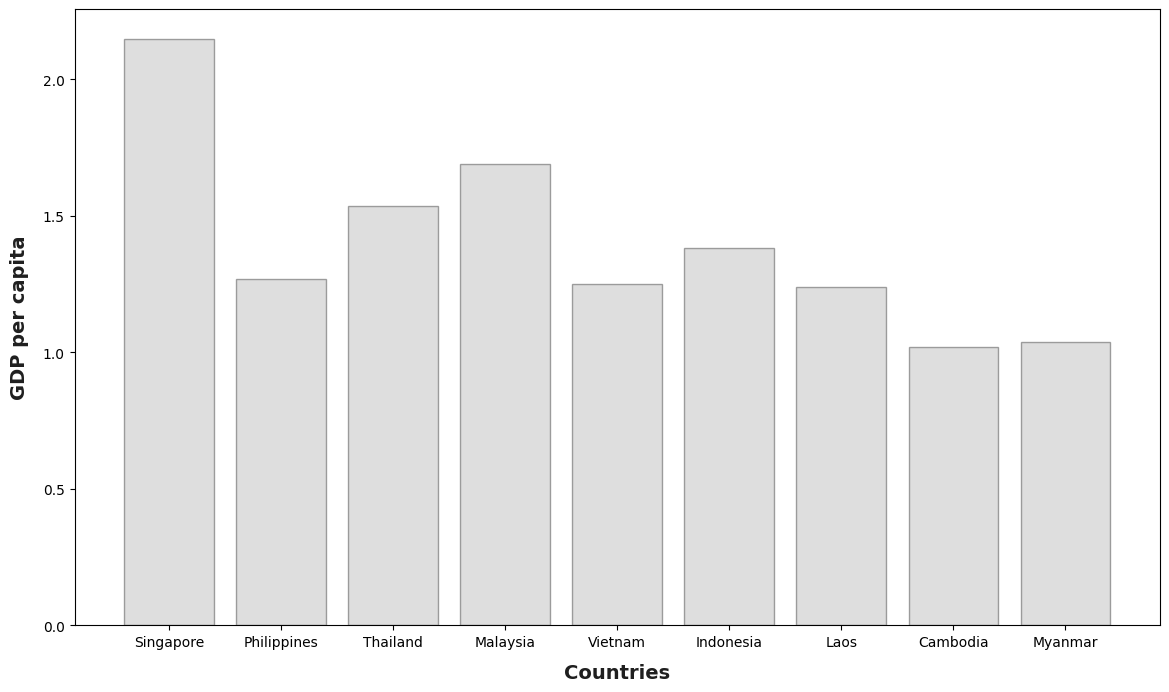

In [ ]:
# Memfilter DataFrame df_2022 untuk hanya memasukkan data dari negara-negara ASEAN
df = df_2022[df_2022['Country'].isin(ASEAN_country)]

# Membuat figur dan sumbu untuk plot
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk menampilkan skor kebahagiaan di setiap negara ASEAN
bars1 = ax.bar(df['Country'], df['Explained by: GDP per capita'], color='#AEAEAE', alpha=0.4, edgecolor='#1F1F1F')

# Mengatur label sumbu x
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color='#1F1F1F')

# Mengatur label sumbu y
ax.set_ylabel("GDP per capita", fontsize=14, labelpad=10, fontweight='bold', color='#1F1F1F')

# Menampilkan plot
plt.show()

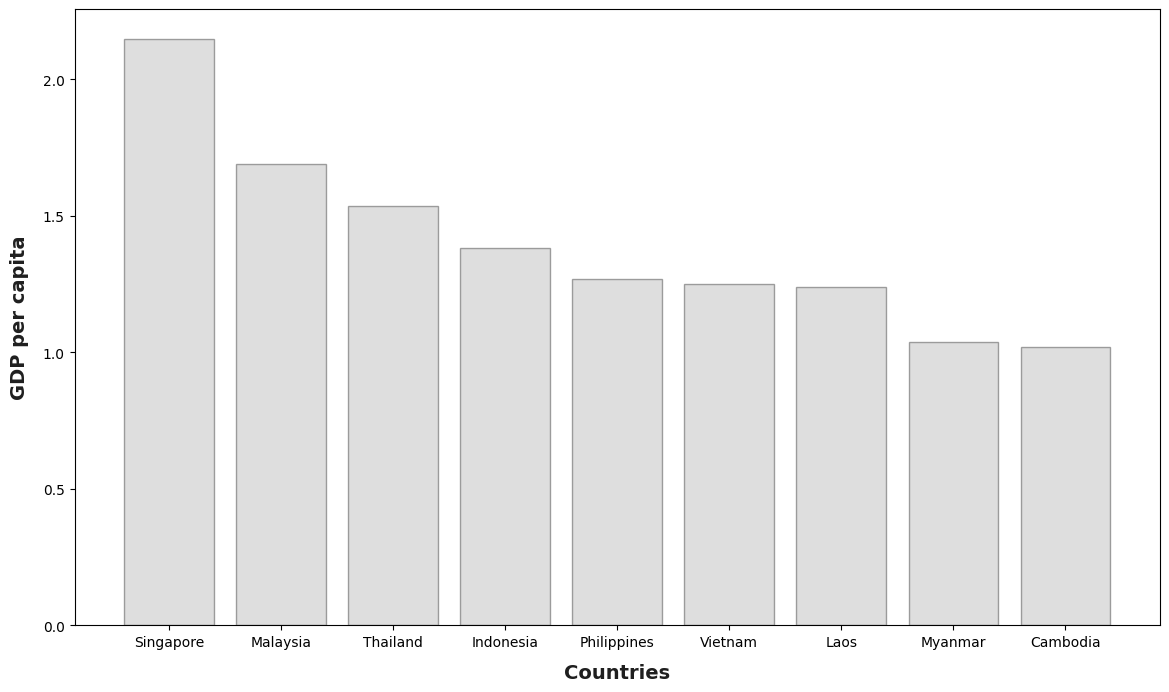

In [ ]:
# Memfilter DataFrame df_2022 untuk hanya memasukkan data dari negara-negara ASEAN
df = df_2022[df_2022['Country'].isin(ASEAN_country)]

# Mengurutkan DataFrame berdasarkan GDP per capita secara descending
df = df.sort_values(by='Explained by: GDP per capita', ascending=False)

# Membuat figur dan sumbu untuk plot
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk menampilkan skor kebahagiaan di setiap negara ASEAN
bars1 = ax.bar(df['Country'], df['Explained by: GDP per capita'], color='#AEAEAE', alpha=0.4, edgecolor='#1F1F1F')

# Mengatur label sumbu x
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color='#1F1F1F')

# Mengatur label sumbu y
ax.set_ylabel("GDP per capita", fontsize=14, labelpad=10, fontweight='bold', color='#1F1F1F')

# Menampilkan plot
plt.show()

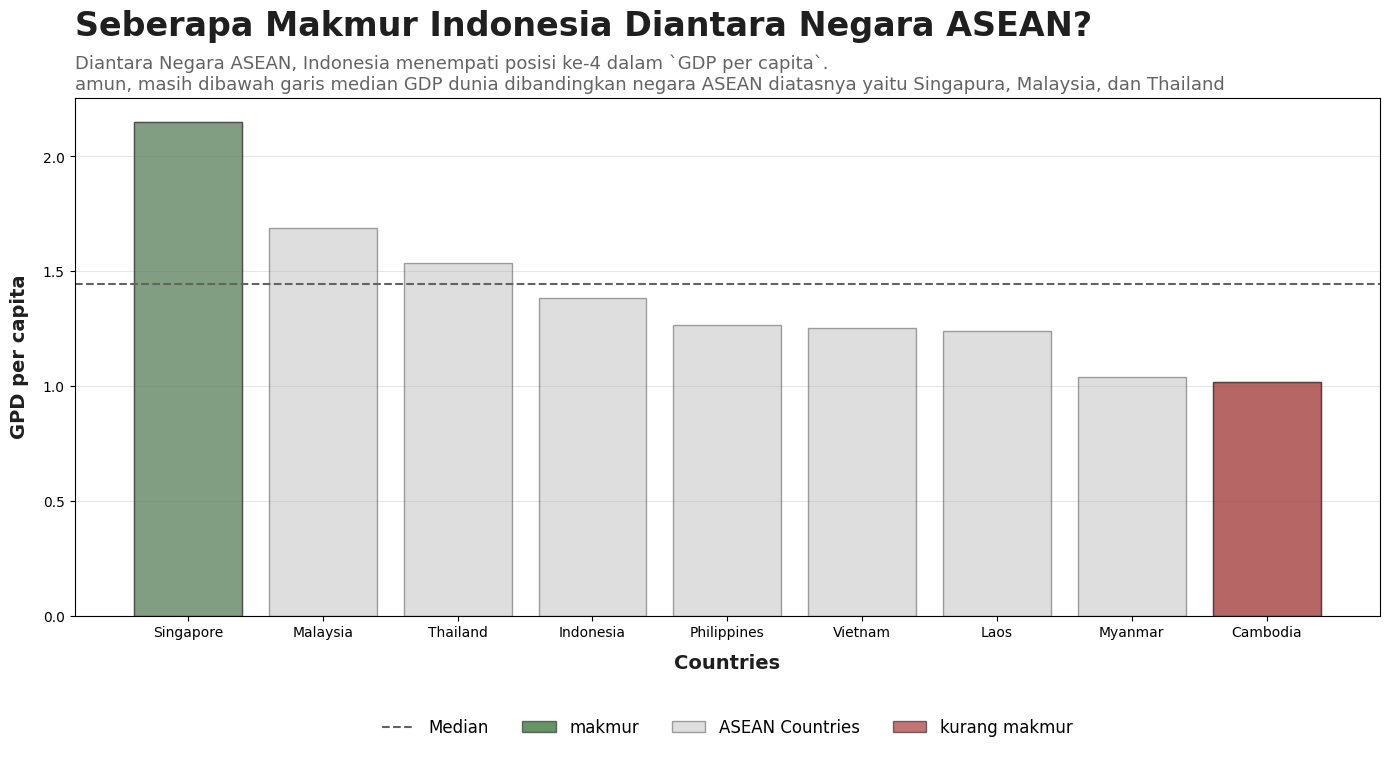

In [ ]:
# Filter DataFrame df_2022 untuk hanya menyertakan negara-negara ASEAN
df = df_2022[df_2022['Country'].isin(ASEAN_country)]

# Mengambil baris pertama dari df_2022 yang mungkin merepresentasikan negara dengan skor kebahagiaan tertinggi
#df_2022_top = df_2022.iloc[0:1]
# Mengambil baris pertama dari df_2022 yang mungkin merepresentasikan negara dengan skor kebahagiaan tertinggi
df_2022_top = df.nlargest(1, 'Explained by: GDP per capita')

# Mengambil baris terakhir dari df_2022 yang mungkin merepresentasikan negara dengan skor kebahagiaan terendah
#df_2022_bot = df_2022.iloc[-1]
# Mengambil baris terakhir dari df_2022 yang mungkin merepresentasikan negara dengan skor kebahagiaan terendah
df_2022_bot = df.nsmallest(1, 'Explained by: GDP per capita')

# Menghitung skor kebahagiaan median dari df_2022
median_score = df_2022['Explained by: GDP per capita'].median()

# Menghitung skor kebahagiaan median dari df_2022
median_score1 = df['Explained by: GDP per capita'].median()

# Mengurutkan DataFrame berdasarkan GDP per capita secara descending
df = df.sort_values(by='Explained by: GDP per capita', ascending=False)

# Membuat figur dan sumbu untuk plot dengan ukuran tertentu
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk negara dengan skor kebahagiaan tertinggi
bars0 = ax.bar(df_2022_top['Country'], df_2022_top['Explained by: GDP per capita'], color=colors_green[0], alpha=0.6, edgecolor='#1F1F1F')

# Membuat grafik bar untuk negara-negara ASEAN
bars1 = ax.bar(df['Country'], df['Explained by: GDP per capita'], color=colors_dark[3], alpha=0.4, edgecolor='#1F1F1F')

# Membuat grafik bar untuk negara dengan skor kebahagiaan terendah
bars2 = ax.bar(df_2022_bot['Country'], df_2022_bot['Explained by: GDP per capita'], color=colors_red[2], alpha=0.6, edgecolor='#1F1F1F')

# Menambahkan garis horizontal untuk menandakan skor kebahagiaan median
line  = ax.axhline(median_score, linestyle='--', color=colors_dark[2])

# Menambahkan legenda untuk grafik
ax.legend(["Median", "makmur", "ASEAN Countries", "kurang makmur"], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, borderpad=1, frameon=False, fontsize=12)

# Menambahkan grid pada sumbu y dan mengatur agar grid berada di belakang bar
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# Mengatur label dan gaya untuk sumbu x dan y
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color='#1F1F1F')
ax.set_ylabel("GPD per capita", fontsize=14, labelpad=10, fontweight='bold', color='#1F1F1F')

# Mendapatkan batas-batas untuk sumbu x dan y
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Menambahkan teks pada grafik untuk memberikan konteks atau informasi tambahan
plt.text(s="Seberapa Makmur Indonesia Diantara Negara ASEAN?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])

# Menambahkan judul dengan informasi posisi Indonesia dalam konteks ASEAN dan global
plt.title(f"Diantara Negara ASEAN, Indonesia menempati posisi ke-4 dalam `GDP per capita`.\namun, masih dibawah garis median GDP dunia dibandingkan negara ASEAN diatasnya yaitu Singapura, Malaysia, dan Thailand", loc='left', fontsize=13, color=colors_dark[2])

# Mengatur layout agar tidak ada elemen yang terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
df_2022.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


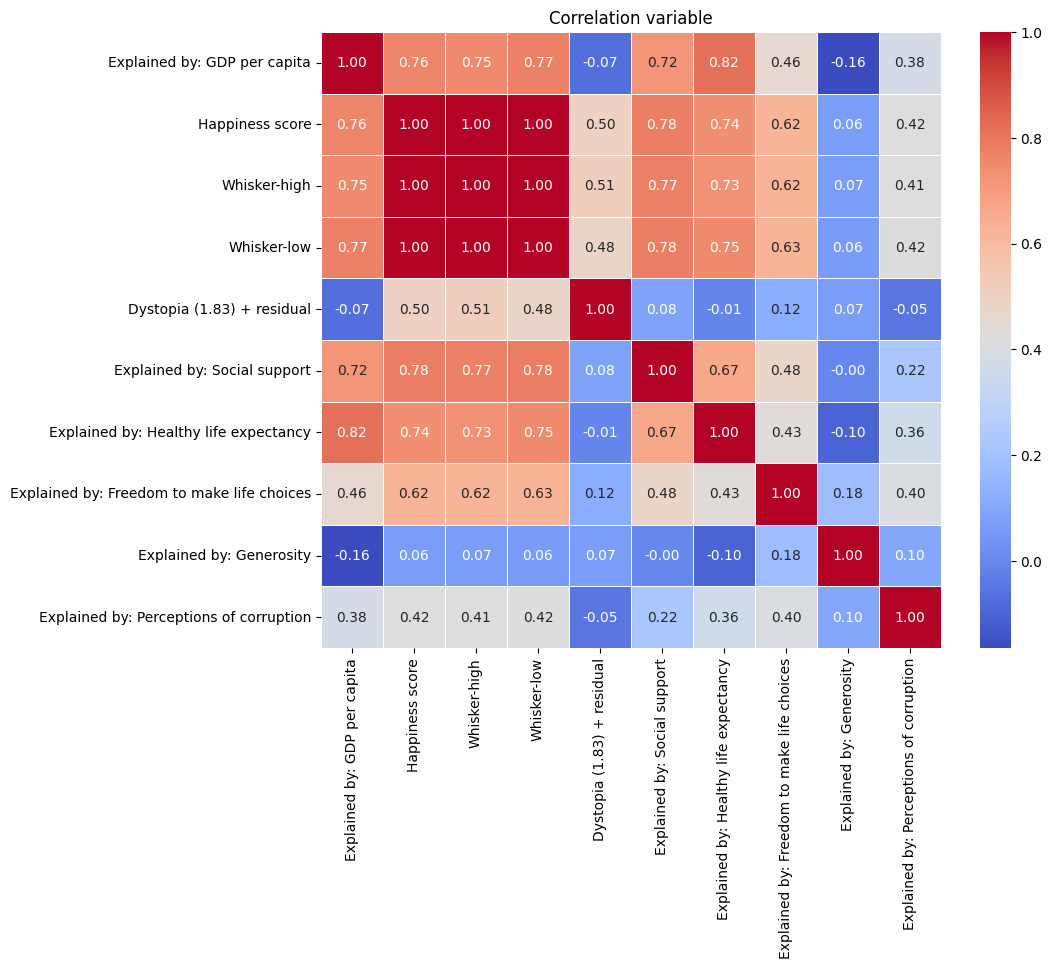

In [ ]:
# Hitung korelasi antar kolom
df_num = df_2022[['Explained by: GDP per capita', 'Happiness score', 'Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption']]
correlation_matrix = df_num.corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation variable')
plt.show()


<ipython-input-18-6d2ffc202b80>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette="viridis", ax=ax)


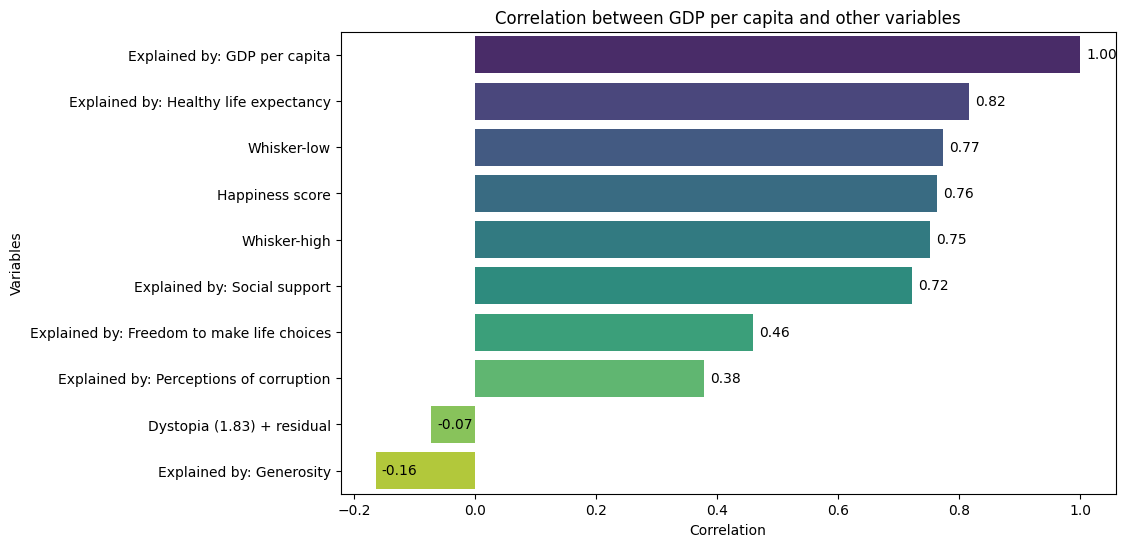

In [ ]:
# Korelasi antara GDP per capita dan variabel lainnya
correlation = df_num.corr().loc['Explained by: GDP per capita', :]

# Mengurutkan korelasi secara descending
correlation = correlation.sort_values(ascending=False)

# Membuat piramida chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot
sns.barplot(x=correlation.values, y=correlation.index, palette="viridis", ax=ax)

# Anotasi pada plot
for i, v in enumerate(correlation.values):
    ax.text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=10, color='black')

# Mengatur label dan judul
ax.set_xlabel('Correlation')
ax.set_ylabel('Variables')
ax.set_title('Correlation between GDP per capita and other variables')

# Menampilkan plot
plt.show()

Berdasarkan chart diatas, dapat dilihat bahwa GDP per capita memiliki hubungan yang sangat kuat dengan Healthy life expectation, namun tidak memiliki hubungan dengan generosity. Kesimpulannya, data menunjukkan bahwa kesejahteraan ekonomi suatu negara cenderung berkorelasi kuat dengan harapan hidup yang sehat, tetapi tidak memiliki hubungan yang signifikan dengan tingkat kedermawanan masyarakat. Hal ini menyoroti kompleksitas faktor-faktor yang mempengaruhi berbagai aspek kehidupan di suatu negara.

#Persepsi Korupsi di ASEAN


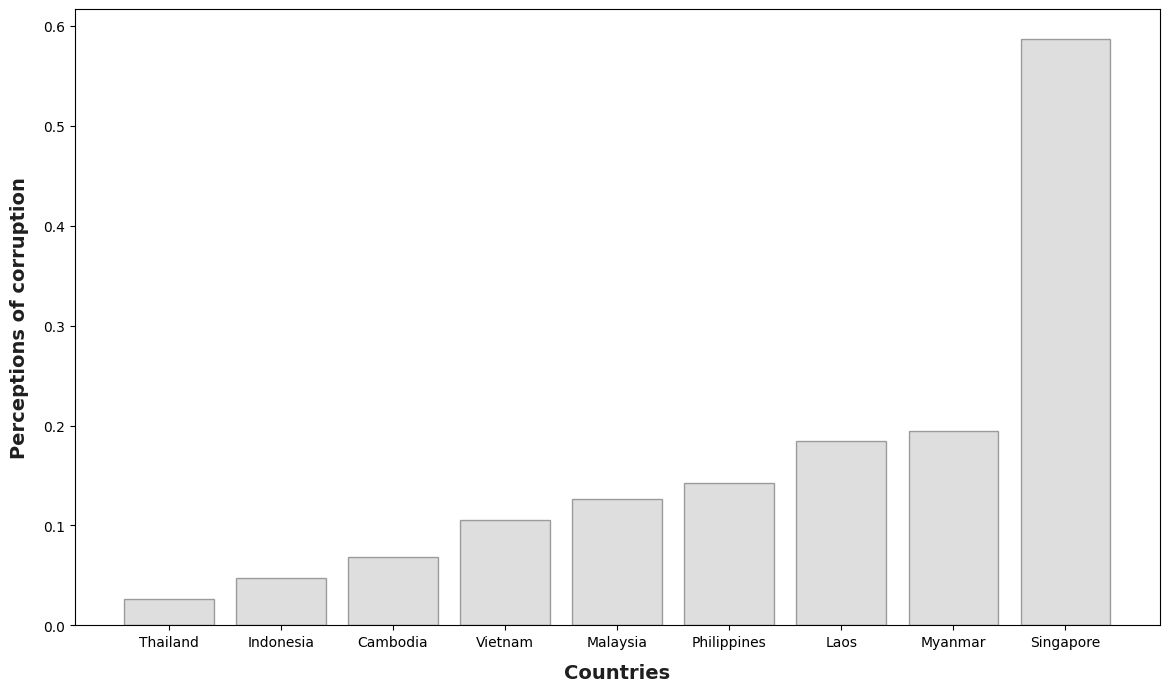

In [ ]:
# Memfilter DataFrame df_2022 untuk hanya memasukkan data dari negara-negara ASEAN
df = df_2022[df_2022['Country'].isin(ASEAN_country)]

# Mengurutkan DataFrame berdasarkan GDP per capita secara descending
df = df.sort_values(by='Explained by: Perceptions of corruption', ascending=True)

# Membuat figur dan sumbu untuk plot
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk menampilkan skor kebahagiaan di setiap negara ASEAN
bars1 = ax.bar(df['Country'], df['Explained by: Perceptions of corruption'], color='#AEAEAE', alpha=0.4, edgecolor='#1F1F1F')

# Mengatur label sumbu x
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color='#1F1F1F')

# Mengatur label sumbu y
ax.set_ylabel("Perceptions of corruption", fontsize=14, labelpad=10, fontweight='bold', color='#1F1F1F')

# Menampilkan plot
plt.show()

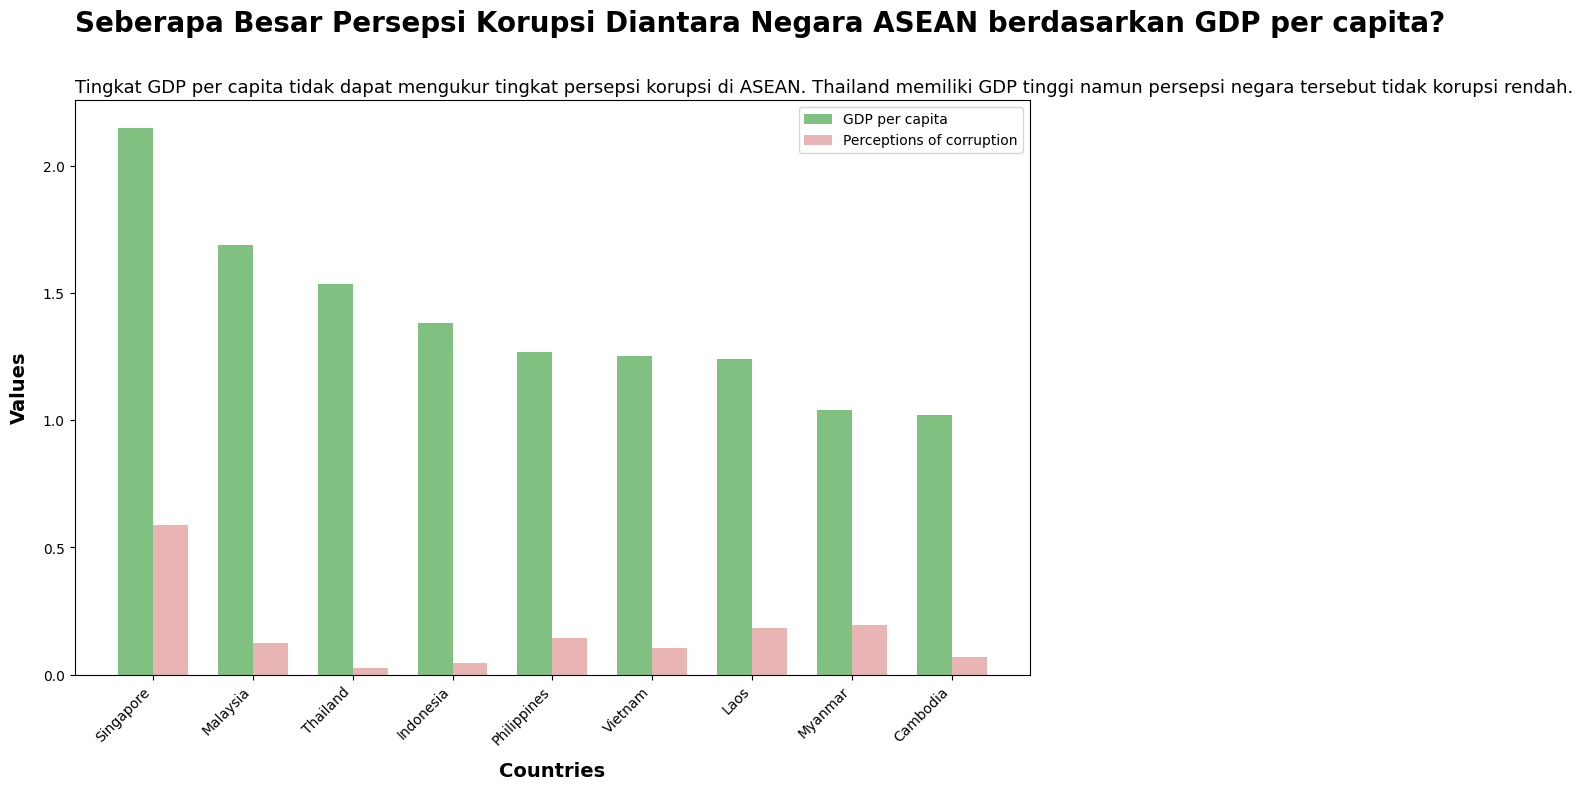

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Memfilter DataFrame df_2022 untuk hanya memasukkan data dari negara-negara ASEAN
df = df_2022[df_2022['Country'].isin(ASEAN_country)]

# Mengurutkan DataFrame berdasarkan GDP per capita secara descending
df = df.sort_values(by='Explained by: GDP per capita', ascending=False)

# Mendefinisikan lebar bar dan posisi x untuk setiap bar
bar_width = 0.35
index = np.arange(len(df))

# Membuat plot
fig, ax = plt.subplots(figsize=(14, 8))

# Menambahkan bar untuk GDP per capita
bars1 = ax.bar(index, df['Explained by: GDP per capita'], bar_width, label='GDP per capita', color='#80C080')

# Menambahkan bar untuk Perceptions of corruption
bars2 = ax.bar(index + bar_width, df['Explained by: Perceptions of corruption'], bar_width, label='Perceptions of corruption', color='#E9B4B4')

# Mengatur label sumbu x dan y serta judul plot
ax.set_xlabel('Countries', fontsize=14, labelpad=10, fontweight='bold', color='black')
ax.set_ylabel('Values', fontsize=14, labelpad=10, fontweight='bold', color='black')


# Menambahkan label pada sumbu x
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['Country'], rotation=45, ha='right')

# Menambahkan legenda
ax.legend()

# Mendapatkan batas-batas untuk sumbu x dan y
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Menambahkan teks pada grafik untuk memberikan konteks atau informasi tambahan
plt.text(s="Seberapa Besar Persepsi Korupsi Diantara Negara ASEAN berdasarkan GDP per capita?", ha='left', x=xmin, y=ymax*1.12, fontsize=20, fontweight='bold', color='black')

# Menambahkan judul dengan informasi posisi Indonesia dalam konteks ASEAN dan global
plt.title(f"Tingkat GDP per capita tidak dapat mengukur tingkat persepsi korupsi di ASEAN. Thailand memiliki GDP tinggi namun persepsi negara tersebut tidak korupsi rendah.", loc='left', fontsize=13, color='black')

# Mengatur layout agar tidak ada elemen yang terpotong
plt.tight_layout()

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan gambar diatas dapat dilihat bahwa negara dengan tingkat GDP yang tinggi memiliki tingkat persepsi mengenai korupsi yang tinggi (semakin tinggi persepsi korupsi semakin besar kepercayaan masyarakat terhadap tidak adanya korupsi). Namun, hal tersebut tidak berlaku di 2 negara yaitu Thailand dan Indonesia. Sehingga sesuai dengan hubungan antara GDP per capita dengan Perception of coruption yang memiliki korelasi sedang (tidak cukup kuat) untuk merepresentasikan hubungan keduanya.